In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv")
print(df.shape)
print(df.dtypes)

(159571, 8)
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


In [3]:
comment = df["comment_text"]

_label = df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
_label.head(5)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [4]:
label = _label.to_numpy()

In [5]:
print(label.shape)
print(_label.shape)

(159571, 6)
(159571, 6)


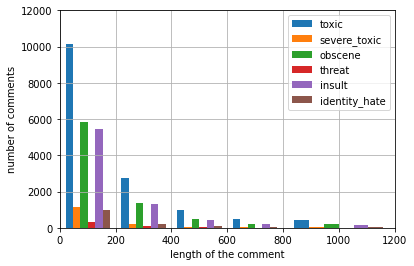

In [6]:
y = np.zeros(label.shape)

for i in range(comment.shape[0]):
    length = len(comment[i])

    for j in range(0, 6):
        if label[i][j]:
            y[i][j] = length

label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
plt.xlabel("length of the comment")
plt.ylabel("number of comments")
plt.hist(y, bins = [1, 200, 400, 600, 800, 1200], label = label_names)
plt.axis([0, 1200, 0, 12000])
plt.grid(True)
plt.legend()
plt.show()

In [7]:
labels = []
comments = []

for i in range(comment.shape[0]):
    if len(comment[i]) < 600:
        is_toxic = 1 if 1 in label[i] else 0
        labels.append(is_toxic)
        comments.append(comment[i])

labels = np.asarray(labels)
# comments = np.asarray(comments)
print(len(comments))
new_df = pd.DataFrame(list(zip(comments, labels)), columns=["comments", "is_toxic"])
new_df.head(10)

132327


,comments,is_toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"You, sir, are my hero. Any chance you remember...",0
4,"""\n\nCongratulations from me as well, use the ...",0
5,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
6,Your vandalism to the Matt Shirvington article...,0
7,Sorry if the word 'nonsense' was offensive to ...,0
8,alignment on this subject and which are contra...,0
9,bbq \n\nbe a man and lets discuss it-maybe ove...,0


In [8]:
import string

# punctuations
punctuations = string.punctuation.replace("\n", "") + "0123456789"
print(string.punctuation.replace("\n", "") + "0123456789")

translation_table = str.maketrans(punctuations, " " * len(punctuations))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [9]:
import nltk

from nltk.stem import PorterStemmer, WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# caring
# lem -> care
# stem -> car
import re

for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(translation_table)

    word_arr = []
    for word in comments[i].split(" "):
        word_arr.append(stemmer.stem(lemmatizer.lemmatize(word, pos="v")))
    comments[i] = re.sub("\W+", " ", " ".join(word_arr))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# apply bow
vectorizer = TfidfVectorizer(stop_words='english')
tf = vectorizer.fit_transform(comments)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf, labels, test_size=0.25, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier 

In [14]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)

In [18]:
conf_mat

array([[28591,   856],
       [ 1055,  2580]], dtype=int64)

In [19]:
from sklearn.metrics import f1_score

In [23]:
print(f"recall     precision    f1 score")

for i in range(len(conf_mat)):
    recall = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[0][1])
    precision = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0])
    f1 = 2 * (precision * recall) / (precision + recall)

    print(f"{round(recall, 3)}       {round(precision, 3)}          {round(f1, 3)}")

print(f1_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

recall     precision    f1 score
0.751       0.71          0.73
0.751       0.71          0.73
0.7297411964361475
0.7297411964361475


In [25]:
print("Train Score: ", classifier.score(X_train, y_train))
print("Test Scode: ", classifier.score(X_test, y_test))

Train Score:  0.99978840243841
Test Scode:  0.9422344477359289


In [28]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(classifier, tf, labels)

In [30]:
cross_val['test_score'].mean()

0.9424456189447545